In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
real_gastro[real_gastro['status_real']==1].describe()

,SubjectID,time_real,status_real
count,970.000000,970.000000,970.0
mean,488723.618557,241.645361,1.0
std,295280.340962,142.403299,0.0
min,533.000000,1.000000,1.0
25%,230641.500000,122.250000,1.0
50%,475936.000000,237.000000,1.0
75%,751373.250000,335.250000,1.0
max,998894.000000,623.000000,1.0


<AxesSubplot:xlabel='time_real', ylabel='Count'>

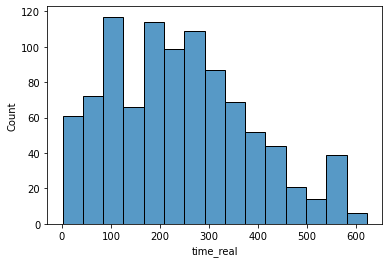

In [121]:
real_gastro_1 = real_gastro[real_gastro['status_real']==1]
sns.histplot(x=real_gastro_1['time_real'])

In [2]:
optimal_gastro = pd.read_csv('Optimal_target_with_92_Q3_2점.csv')
real_gastro = pd.read_csv('Real_target_full_time.csv')
feature = pd.read_csv('imputed features_final.csv')

In [3]:
optimal_gastro.drop(columns='Unnamed: 0', inplace=True)
real_gastro.drop(columns='Unnamed: 0', inplace=True)
feature.drop(columns='Unnamed: 0', inplace=True)

In [4]:
feature = feature.merge(optimal_gastro, on='SubjectID', how='inner')
feature = feature.merge(real_gastro, on='SubjectID', how='inner')
feature

,SubjectID,Age,Gender,diag_delta,onset_delta,onset_site,diag_minus_onset,fvc_slope,fvc_mean,mean_alsfrs_total,...,slope_Q7_Turning_in_Bed,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_Q10_Respiratory,slope_Bulbar,slope_motor,time_opt,status_opt,time_real,status_real
0,329.0,38.0,0.0,-1068.0,-1706.0,0.0,638.0,0.048171,101.250000,27.900000,...,0.013889,0.000000,0.013889,0.000000,0.000000,0.041667,274,0,274,0
1,348.0,52.0,0.0,-302.0,-501.0,0.0,199.0,-0.418109,97.421687,30.250000,...,0.016393,0.000000,0.000000,0.000000,0.000000,-0.016393,401,0,401,0
2,708.0,46.0,1.0,-986.0,-1070.0,1.0,84.0,-0.061928,51.000000,32.250000,...,0.000000,0.000000,0.000000,-0.010989,-0.010989,0.010989,35,1,231,0
3,2492.0,63.0,1.0,-209.0,-365.0,0.0,156.0,-0.235294,114.000000,30.000000,...,0.029412,0.000000,0.000000,0.000000,0.000000,0.000000,401,0,401,0
4,3971.0,55.0,0.0,-378.0,-763.0,0.0,385.0,-0.142857,86.000000,30.000000,...,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,378,0,378,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2888,998542.0,70.0,1.0,-73.0,-287.0,0.0,214.0,0.000000,85.000000,27.500000,...,0.000000,0.000000,0.000000,-0.125000,0.000000,0.000000,8,0,8,0
2889,998756.0,64.0,1.0,-241.0,-612.0,1.0,371.0,-0.255102,73.333333,29.333333,...,0.017544,0.000000,0.000000,0.000000,0.000000,0.000000,64,0,64,0
2890,999166.0,60.0,1.0,-49.0,-999.0,1.0,950.0,-0.333333,75.000000,35.000000,...,-0.008895,-0.025678,-0.036810,-0.002018,-0.004339,-0.018044,390,0,390,0
2891,999880.0,51.0,1.0,-2105.0,-2865.0,0.0,760.0,-0.079112,50.250000,24.200000,...,0.028571,0.000000,0.000000,0.000000,0.000000,0.014286,266,0,266,0


In [5]:
feature1 = feature.copy()
feature1 = feature1[(feature1['status_opt']== 1)]
feature1 = feature1[(feature1['status_real']== 1)]
feature1['real_minus_optimal_gas_time'] = feature1['time_real']-feature1['time_opt']
feature1.describe()

,SubjectID,Age,Gender,diag_delta,onset_delta,onset_site,diag_minus_onset,fvc_slope,fvc_mean,mean_alsfrs_total,...,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_Q10_Respiratory,slope_Bulbar,slope_motor,time_opt,status_opt,time_real,status_real,real_minus_optimal_gas_time
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,...,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.0,367.000000,367.0,367.000000
mean,487938.746594,57.068120,0.553134,-220.021798,-505.122616,0.365123,285.100817,-0.136998,76.179350,27.625840,...,-0.002985,-0.005137,-0.001002,-0.008376,-0.021355,184.125341,1.0,235.193460,1.0,51.068120
std,298427.296120,11.234619,0.497848,198.412014,333.263870,0.482122,239.918937,0.316785,18.050897,6.084945,...,0.021412,0.025748,0.023303,0.028576,0.068226,117.856403,0.0,112.127139,0.0,123.751705
min,6786.000000,24.000000,0.000000,-1566.000000,-4274.000000,0.000000,-199.000000,-1.500000,15.037550,10.000000,...,-0.111111,-0.125000,-0.076923,-0.153846,-0.250000,7.000000,1.0,1.000000,1.0,-734.000000
25%,237508.000000,48.500000,0.000000,-302.500000,-611.000000,0.000000,143.000000,-0.294336,64.333333,23.250000,...,0.000000,-0.012423,0.000000,-0.015873,-0.044531,94.000000,1.0,155.500000,1.0,0.000000
50%,483798.000000,59.000000,1.000000,-165.000000,-446.000000,0.000000,236.000000,-0.125659,75.000000,28.666667,...,0.000000,0.000000,0.000000,0.000000,-0.017241,167.000000,1.0,238.000000,1.0,36.000000
75%,748194.500000,65.000000,1.000000,-83.000000,-302.000000,1.000000,355.500000,0.004235,88.500000,32.450000,...,0.000000,0.000000,0.000000,0.000000,0.000000,261.000000,1.0,311.000000,1.0,113.500000
max,996711.000000,82.000000,1.000000,-1.000000,-84.000000,1.000000,2708.000000,1.375000,133.000000,39.000000,...,0.333333,0.333333,0.333333,0.333333,1.000000,736.000000,1.0,530.000000,1.0,397.000000


<AxesSubplot:xlabel='real_minus_optimal_gas_time', ylabel='Count'>

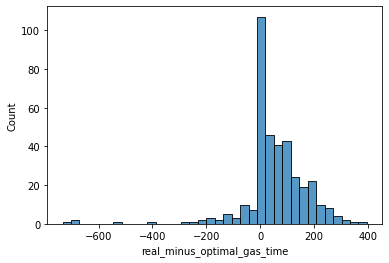

In [6]:
sns.histplot(x=feature1['real_minus_optimal_gas_time'])

In [7]:
surv = pd.read_csv('survival.csv')

In [8]:
zero_list = list(feature1[feature1['real_minus_optimal_gas_time']==0]['SubjectID'])
print(len(zero_list))

105


In [9]:
feature_early =  feature1[(feature1['real_minus_optimal_gas_time']< 0) ] 
feature_medium =  feature1[(feature1['real_minus_optimal_gas_time']== 0)]
feature_late =  feature1[(feature1['real_minus_optimal_gas_time']>0) ]

early_list = list(feature_early['SubjectID'])
medium_list = list(feature_medium['SubjectID'])
late_list = list(feature_late['SubjectID'])

In [10]:
surv_early = surv.copy()
surv_medium = surv.copy()
surv_late = surv.copy()

surv_early.query("SubjectID == {0}".format(early_list), inplace=True)
surv_medium.query("SubjectID == {0}".format(medium_list), inplace=True)
surv_late.query("SubjectID == {0}".format(late_list), inplace=True)

In [11]:
feature2 = feature.copy()
feature2 = feature2[(feature2['status_opt'] == 1) & (feature2['status_real'] == 0)]
add_late_list = list(feature2['SubjectID'])
feature3 = feature.copy()
feature3 = feature3[(feature3['status_opt'] == 0) & (feature3['status_real'] == 1)]
add_early_list = list(feature3['SubjectID'])
print(len(add_late_list))
print(len(add_early_list))
print(len(early_list))
print(len(medium_list))
print(len(late_list))

533
38
39
105
223


In [12]:
feature_early4 =  feature1[(feature1['real_minus_optimal_gas_time']<0) ] 
feature_medium4 =  feature1[(feature1['real_minus_optimal_gas_time']== 0)]
feature_late4 =  feature1[(feature1['real_minus_optimal_gas_time']>0) ] 

early_list4 = list(feature_early4['SubjectID']) + add_early_list
medium_list4 = list(feature_medium4['SubjectID'])
late_list4 = list(feature_late4['SubjectID']) + add_late_list

surv_early_2 = surv.copy()
surv_medium_2 = surv.copy()
surv_late_2 = surv.copy()

surv_early_2.query("SubjectID == {0}".format(early_list4), inplace=True)
surv_medium_2.query("SubjectID == {0}".format(medium_list4), inplace=True)
surv_late_2.query("SubjectID == {0}".format(late_list4),inplace=True)

print(len(early_list4))
print(len(medium_list4))
print(len(late_list4))

77
105
756


<AxesSubplot:xlabel='time (days)', ylabel='survival function, $\\hat{S}(t)$'>

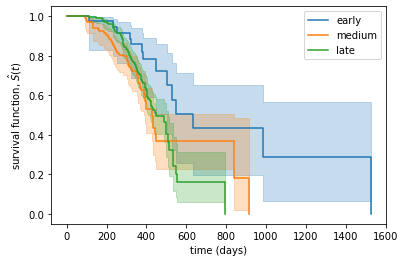

In [13]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

kmf = KaplanMeierFitter()
kmf.fit(surv_early["time_event"], surv_early["status"], label="early")
ax_kmf = kmf.plot()
kmf.fit(surv_medium["time_event"], surv_medium["status"], label="medium")
ax_kmf = kmf.plot(ax=ax_kmf)
kmf.fit(surv_late["time_event"], surv_late["status"], label="late")
ax_kmf = kmf.plot(ax=ax_kmf)

ax_kmf.set_xlabel('time (days)')
ax_kmf.set_ylabel('survival function, $\hat{S}(t)$')
ax_kmf

In [14]:
print("Early vs Late discrimination : "+ str(logrank_test(surv_early["time_event"], surv_late["time_event"], surv_early["status"], surv_late["status"]).p_value)+" of p value")

Early vs Late discrimination : 0.005558202838382047 of p value


In [15]:
validate_add_late = feature2[['SubjectID','time_opt', 'time_real']]
validate_add_late['real(0)-optimal(1)'] = validate_add_late['time_real'] - validate_add_late['time_opt']
validate_add_late = validate_add_late[validate_add_late['real(0)-optimal(1)']<0]
validate_add_late

<ipython-input-15-4e2bc4f30263>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validate_add_late['real(0)-optimal(1)'] = validate_add_late['time_real'] - validate_add_late['time_opt']


,SubjectID,time_opt,time_real,real(0)-optimal(1)


In [16]:
remove_early_list = []

In [17]:
validate_add_early = feature3[['SubjectID','time_opt', 'time_real']]
validate_add_early['optimal(0)-real(1)'] = validate_add_early['time_opt'] - validate_add_early['time_real']
validate_add_early

<ipython-input-17-7921d965c4b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validate_add_early['optimal(0)-real(1)'] = validate_add_early['time_opt'] - validate_add_early['time_real']


,SubjectID,time_opt,time_real,optimal(0)-real(1)
14,7750.0,385,385,0
193,62767.0,376,376,0
298,103126.0,399,147,252
325,109303.0,133,133,0
332,111495.0,392,90,302
397,129721.0,371,371,0
443,147061.0,381,259,122
514,169905.0,378,378,0
527,173029.0,378,252,126
607,203351.0,390,390,0


In [18]:
validate_add_early = validate_add_early[validate_add_early['optimal(0)-real(1)']<0]
validate_add_early

,SubjectID,time_opt,time_real,optimal(0)-real(1)


In [19]:
survival=surv.copy()
feature_surv = feature.merge(survival, on='SubjectID', how='inner')

In [20]:
feature_surv_early = feature_surv.copy()
feature_surv_early.query("SubjectID == {0}".format(early_list4), inplace=True)
feature_surv_early['delayed_gas'] = 0 
feature_surv_early

,SubjectID,Age,Gender,diag_delta,onset_delta,onset_site,diag_minus_onset,fvc_slope,fvc_mean,mean_alsfrs_total,...,slope_Q10_Respiratory,slope_Bulbar,slope_motor,time_opt,status_opt,time_real,status_real,time_event,status,delayed_gas
13,7750.0,71.0,1.0,-135.0,-445.0,0.0,310.0,-0.085392,69.666667,31.50,...,-0.016949,0.000000,0.000000,385,0,385,1,385,0,0
16,8150.0,57.0,1.0,-385.0,-538.0,0.0,153.0,-0.002933,84.200000,18.50,...,0.000000,0.000000,-0.024691,353,1,303,1,416,0,0
69,24570.0,37.0,1.0,-142.0,-280.0,0.0,138.0,0.045731,81.465291,27.25,...,0.000000,-0.013699,-0.041096,470,1,442,1,470,0,0
73,26082.0,52.0,0.0,-239.0,-331.0,0.0,92.0,-0.257285,59.250000,32.40,...,0.000000,-0.013889,-0.013889,219,1,191,1,114,1,0
105,35064.0,75.0,0.0,-24.0,-339.0,0.0,315.0,0.026538,75.666667,29.00,...,0.000000,-0.015152,-0.030303,217,1,180,1,232,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,916630.0,36.0,0.0,-115.0,-358.0,0.0,243.0,0.109093,101.200000,26.75,...,0.000000,0.000000,-0.035714,374,0,346,1,374,0,0
2565,941388.0,35.0,0.0,-87.0,-544.0,0.0,457.0,0.063686,80.000000,33.75,...,0.000000,-0.011905,-0.071429,226,1,2,1,304,0,0
2651,965731.0,57.0,1.0,-56.0,-264.0,0.0,208.0,-0.322034,66.500000,24.50,...,-0.016949,0.000000,-0.101695,189,0,189,1,356,1,0
2704,981681.0,54.0,0.0,-435.0,-496.0,0.0,61.0,0.078798,77.000000,25.00,...,0.000000,0.000000,0.000000,396,0,158,1,730,1,0


In [21]:
feature_surv_late = feature_surv.copy()
feature_surv_late.query("SubjectID == {0}".format(late_list4), inplace=True)
feature_surv_late['delayed_gas'] = 1
feature_surv_late

,SubjectID,Age,Gender,diag_delta,onset_delta,onset_site,diag_minus_onset,fvc_slope,fvc_mean,mean_alsfrs_total,...,slope_Q10_Respiratory,slope_Bulbar,slope_motor,time_opt,status_opt,time_real,status_real,time_event,status,delayed_gas
2,708.0,46.0,1.0,-986.0,-1070.0,1.0,84.0,-0.061928,51.000000,32.250000,...,-0.010989,-0.010989,0.010989,35,1,231,0,250,1,1
6,4877.0,43.0,0.0,-64.0,-596.0,1.0,532.0,-0.448583,69.355654,23.000000,...,0.000000,0.000000,-0.014085,281,1,434,0,434,0,1
8,5658.0,69.0,1.0,-192.0,-284.0,0.0,92.0,-0.004942,80.000000,21.333333,...,0.000000,0.000000,-0.045977,353,1,353,0,353,0,1
12,7468.0,48.0,1.0,-202.0,-298.0,0.0,96.0,-0.428571,61.000000,25.000000,...,0.000000,0.000000,-0.142857,149,1,149,0,149,0,1
20,9641.0,41.0,1.0,-893.0,-1091.0,0.0,198.0,0.222809,75.119870,25.000000,...,-0.011765,0.000000,0.000000,440,1,502,0,502,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,993158.0,64.0,0.0,-117.0,-491.0,0.0,374.0,0.114870,72.790877,28.250000,...,0.000000,0.000000,-0.015385,464,1,464,0,464,0,1
2751,994853.0,43.0,1.0,-293.0,-673.0,0.0,380.0,0.576838,76.142703,22.750000,...,0.000000,0.000000,-0.025641,236,1,384,0,384,0,1
2752,994895.0,70.0,1.0,-181.0,-332.0,1.0,151.0,-0.154866,51.893808,29.500000,...,0.014085,-0.028169,-0.042254,45,1,191,1,436,0,1
2754,995893.0,46.0,0.0,-212.0,-274.0,1.0,62.0,-0.057877,94.283933,20.500000,...,0.000000,-0.011765,-0.058824,85,1,175,1,410,0,1


In [22]:
X = pd.concat([feature_surv_early, feature_surv_late])
X

,SubjectID,Age,Gender,diag_delta,onset_delta,onset_site,diag_minus_onset,fvc_slope,fvc_mean,mean_alsfrs_total,...,slope_Q10_Respiratory,slope_Bulbar,slope_motor,time_opt,status_opt,time_real,status_real,time_event,status,delayed_gas
13,7750.0,71.0,1.0,-135.0,-445.0,0.0,310.0,-0.085392,69.666667,31.50,...,-0.016949,0.000000,0.000000,385,0,385,1,385,0,0
16,8150.0,57.0,1.0,-385.0,-538.0,0.0,153.0,-0.002933,84.200000,18.50,...,0.000000,0.000000,-0.024691,353,1,303,1,416,0,0
69,24570.0,37.0,1.0,-142.0,-280.0,0.0,138.0,0.045731,81.465291,27.25,...,0.000000,-0.013699,-0.041096,470,1,442,1,470,0,0
73,26082.0,52.0,0.0,-239.0,-331.0,0.0,92.0,-0.257285,59.250000,32.40,...,0.000000,-0.013889,-0.013889,219,1,191,1,114,1,0
105,35064.0,75.0,0.0,-24.0,-339.0,0.0,315.0,0.026538,75.666667,29.00,...,0.000000,-0.015152,-0.030303,217,1,180,1,232,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,993158.0,64.0,0.0,-117.0,-491.0,0.0,374.0,0.114870,72.790877,28.25,...,0.000000,0.000000,-0.015385,464,1,464,0,464,0,1
2751,994853.0,43.0,1.0,-293.0,-673.0,0.0,380.0,0.576838,76.142703,22.75,...,0.000000,0.000000,-0.025641,236,1,384,0,384,0,1
2752,994895.0,70.0,1.0,-181.0,-332.0,1.0,151.0,-0.154866,51.893808,29.50,...,0.014085,-0.028169,-0.042254,45,1,191,1,436,0,1
2754,995893.0,46.0,0.0,-212.0,-274.0,1.0,62.0,-0.057877,94.283933,20.50,...,0.000000,-0.011765,-0.058824,85,1,175,1,410,0,1


In [23]:
X = X[['Age', 'Gender', 'onset_site', 'onset_delta',
       'diag_minus_onset', 'slope_alsfrs_tot',
       'fvc_slope', 'fvc_mean',  'mean_Q10_Respiratory',
       'mean_Bulbar', 'mean_motor', 'slope_Q1_Speech', 'slope_Q2_Salivation',
       'slope_Q3_Swallowing', 'slope_Q4_Handwriting', 'slope_Q5_Cutting',
       'slope_Q6_Dressing_and_Hygiene', 'slope_Q7_Turning_in_Bed',
       'slope_Q8_Walking', 'slope_Q9_Climbing_Stairs', 'delayed_gas','slope_Q10_Respiratory','time_event','status']]

In [24]:
from lifelines import CoxPHFitter

In [25]:
cph = CoxPHFitter(penalizer=0.1)
cph.fit(X, 'time_event', event_col='status')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 828 total observations, 566 right-censored observations>
             duration col = 'time_event'
                event col = 'status'
                penalizer = 0.1
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 828
number of events observed = 262
   partial log-likelihood = -1451.65
         time fit was run = 2021-05-22 15:30:05 UTC

---
                                coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                             
Age                             0.03       1.03       0.01             0.02             0.04                 1.02                 1.04
Gender                          0.12       1.13       0.11            -0.10             0.34                 0.90                 1.40
onset_site                     -0.23       0.79       0.15            -0.53             0.07                 0.59                 1.07
onset_delta                    -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
diag_minus_onset                0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
slope_alsfrs_tot               -0.72       0.49       0.98            -2.65             1.21                 0.07                 3.34
fvc_slope                      -0.23       0.79       0.18            -0.58             0.11                 0.56                 1.12
fvc_mean                       -0.01       0.99       0.00            -0.01            -0.00                 0.99                 1.00
mean_Q10_Respiratory            0.02       1.02       0.09            -0.17             0.20                 0.85                 1.22
mean_Bulbar                    -0.04       0.96       0.05            -0.13             0.05                 0.88                 1.06
mean_motor                     -0.04       0.96       0.01            -0.06            -0.02                 0.94                 0.98
slope_Q1_Speech                 0.23       1.26       2.62            -4.92             5.37                 0.01               215.15
slope_Q2_Salivation            -1.47       0.23       3.38            -8.10             5.16                 0.00               174.62
slope_Q3_Swallowing            -2.75       0.06       3.24            -9.11             3.61                 0.00                36.81
slope_Q4_Handwriting            5.44     230.95       2.86            -0.15            11.04                 0.86             62231.60
slope_Q5_Cutting               -8.09       0.00       3.52           -14.99            -1.19                 0.00                 0.31
slope_Q6_Dressing_and_Hygiene  -4.45       0.01       3.47           -11.25             2.34                 0.00                10.38
slope_Q7_Turning_in_Bed        -2.86       0.06       1.78            -6.34             0.62                 0.00                 1.87
slope_Q8_Walking               -4.04       0.02       4.32           -12.50             4.43                 0.00                83.69
slope_Q9_Climbing_Stairs       -2.24       0.11       2.43            -7.00             2.52                 0.00                12.42
delayed_gas                     0.68       1.98       0.20             0.29             1.07                 1.34                 2.92
slope_Q10_Respiratory          -1.63       0.20       3.45            -8.39             5.13                 0.00               169.82

                                  z      p   -log2(p)
covariate                                            
Age                            5.79 <0.005      27.05
Gender                         1.06   0.29       1.78
onset_site                    -1.53   0.13       2.99
onset_delta                   -0.14   0.89       0.17
diag_m

<AxesSubplot:xlabel='log(HR) (95% CI)'>

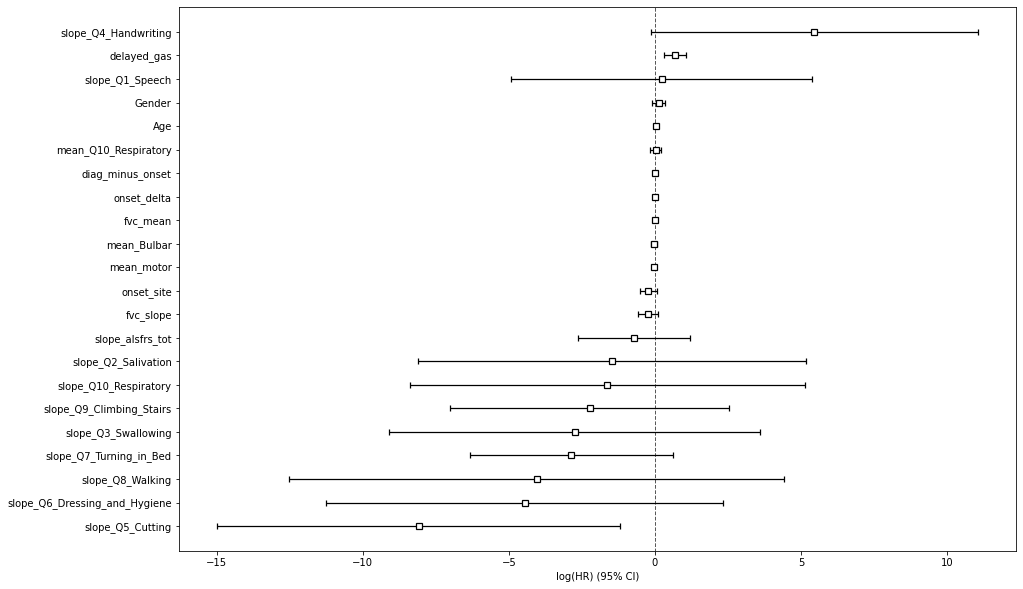

In [26]:
plt.figure(figsize=(15,10))
cph.plot()
#HR >1, 즉 log(HR)>0 이면 사망 위험 증가를 뜻함

In [27]:
feature1['real_minus_optimal_gas_time'].quantile(q=0.9, interpolation='nearest')

189

In [41]:
feature1['real_minus_optimal_gas_time'].quantile(q=0.8, interpolation='nearest')

134

In [46]:
feature1['real_minus_optimal_gas_time'].quantile(q=0.7, interpolation='nearest')

92

In [50]:
feature1['real_minus_optimal_gas_time'].quantile(q=0.6, interpolation='nearest')

65

In [52]:
feature1['real_minus_optimal_gas_time'].quantile(q=0.5, interpolation='nearest')

36

In [61]:
feature1['real_minus_optimal_gas_time'].quantile(q=0.4, interpolation='nearest')

22

In [95]:
feature1['real_minus_optimal_gas_time'].quantile(q=0.3920, interpolation='nearest')

0

In [115]:
feature1['real_minus_optimal_gas_time'].quantile(q=0.11, interpolation='nearest')

0

In [39]:
feature_early_90 =  feature1[(feature1['real_minus_optimal_gas_time']<189) ] 
feature_late_90 =  feature1[(feature1['real_minus_optimal_gas_time']>189) ] 

early_list_90 = list(feature_early_90['SubjectID'])
late_list_90 = list(feature_late_90['SubjectID'])

surv_early_90 = surv.copy()
surv_medium_90 = surv.copy()
surv_late_90 = surv.copy()

surv_early_90.query("SubjectID == {0}".format(early_list_90), inplace=True)
surv_late_90.query("SubjectID == {0}".format(late_list_90),inplace=True)

print(len(early_list_90))
print(len(late_list_90))

328
36


In [40]:
print("Early vs Late discrimination 90 percentile: "+ str(logrank_test(surv_early_7["time_event"], surv_late_7["time_event"], surv_early_7["status"], surv_late_7["status"]).p_value)+" of p value")

Early vs Late discrimination 90 percentile: 0.0023140766963623055 of p value


In [42]:
feature_early_80 =  feature1[(feature1['real_minus_optimal_gas_time']<134) ] 
feature_late_80 =  feature1[(feature1['real_minus_optimal_gas_time']>134) ] 

early_list_80 = list(feature_early_80['SubjectID'])
late_list_80 = list(feature_late_80['SubjectID'])

surv_early_80 = surv.copy()
surv_medium_80 = surv.copy()
surv_late_80 = surv.copy()

surv_early_80.query("SubjectID == {0}".format(early_list_80), inplace=True)
surv_late_80.query("SubjectID == {0}".format(late_list_80),inplace=True)

print(len(early_list_80))
print(len(late_list_80))

293
73


In [54]:
feature_early_70 =  feature1[(feature1['real_minus_optimal_gas_time']<92) ] 
feature_late_70 =  feature1[(feature1['real_minus_optimal_gas_time']>=92) ] 

early_list_70 = list(feature_early_70['SubjectID'])
late_list_70 = list(feature_late_70['SubjectID'])

surv_early_70 = surv.copy()
surv_medium_70 = surv.copy()
surv_late_70 = surv.copy()

surv_early_70.query("SubjectID == {0}".format(early_list_70), inplace=True)
surv_late_70.query("SubjectID == {0}".format(late_list_70),inplace=True)

print(len(early_list_70))
print(len(late_list_70))

254
113


In [53]:
feature_early_60 =  feature1[(feature1['real_minus_optimal_gas_time']<65) ] 
feature_late_60 =  feature1[(feature1['real_minus_optimal_gas_time']>=65) ] 

early_list_60 = list(feature_early_60['SubjectID'])
late_list_60 = list(feature_late_60['SubjectID'])

surv_early_60 = surv.copy()
surv_medium_60 = surv.copy()
surv_late_60 = surv.copy()

surv_early_60.query("SubjectID == {0}".format(early_list_60), inplace=True)
surv_late_60.query("SubjectID == {0}".format(late_list_60),inplace=True)

print(len(early_list_60))
print(len(late_list_60))

219
148


In [55]:
feature_early_50 =  feature1[(feature1['real_minus_optimal_gas_time']<36) ] 
feature_late_50 =  feature1[(feature1['real_minus_optimal_gas_time']>=36) ] 

early_list_50 = list(feature_early_50['SubjectID'])
late_list_50 = list(feature_late_50['SubjectID'])

surv_early_50 = surv.copy()
surv_medium_50 = surv.copy()
surv_late_50 = surv.copy()

surv_early_50.query("SubjectID == {0}".format(early_list_50), inplace=True)
surv_late_50.query("SubjectID == {0}".format(late_list_50),inplace=True)

print(len(early_list_50))
print(len(late_list_50))

182
185


In [64]:
feature_early_40 =  feature1[(feature1['real_minus_optimal_gas_time']<22) ] 
feature_late_40 =  feature1[(feature1['real_minus_optimal_gas_time']>=22) ] 

early_list_40 = list(feature_early_40['SubjectID'])
late_list_40 = list(feature_late_40['SubjectID'])

surv_early_40 = surv.copy()
surv_medium_40 = surv.copy()
surv_late_40 = surv.copy()

surv_early_40.query("SubjectID == {0}".format(early_list_40), inplace=True)
surv_late_40.query("SubjectID == {0}".format(late_list_40),inplace=True)

print(len(early_list_40))
print(len(late_list_40))

146
221


In [69]:
feature_early_30 =  feature1[(feature1['real_minus_optimal_gas_time']<=0) ] 
feature_late_30 =  feature1[(feature1['real_minus_optimal_gas_time']>0) ] 

early_list_30 = list(feature_early_30['SubjectID'])
late_list_30 = list(feature_late_30['SubjectID'])

surv_early_30 = surv.copy()
surv_medium_30 = surv.copy()
surv_late_30 = surv.copy()

surv_early_30.query("SubjectID == {0}".format(early_list_30), inplace=True)
surv_late_30.query("SubjectID == {0}".format(late_list_30),inplace=True)

print(len(early_list_30))
print(len(late_list_30))

144
223


In [125]:
feature_early_31 =  feature1[(feature1['real_minus_optimal_gas_time']<0) ] 
feature_late_31 =  feature1[(feature1['real_minus_optimal_gas_time']>0) ] 

early_list_31 = list(feature_early_31['SubjectID'])
late_list_31 = list(feature_late_31['SubjectID'])

surv_early_31 = surv.copy()
surv_medium_31 = surv.copy()
surv_late_31 = surv.copy()

surv_early_31.query("SubjectID == {0}".format(early_list_31), inplace=True)
surv_late_31.query("SubjectID == {0}".format(late_list_31),inplace=True)

print(len(early_list_31))
print(len(late_list_31))

39
223


<AxesSubplot:title={'center':'90 percentile'}, xlabel='time (days)', ylabel='survival function, $\\hat{S}(t)$'>

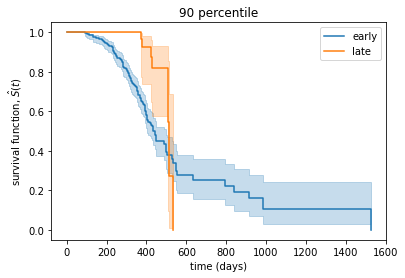

In [56]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

kmf = KaplanMeierFitter()
kmf.fit(surv_early_90["time_event"], surv_early_90["status"], label="early")
ax_kmf = kmf.plot()
kmf.fit(surv_late_90["time_event"], surv_late_90["status"], label="late")
ax_kmf = kmf.plot(ax=ax_kmf)

ax_kmf.set_xlabel('time (days)')
ax_kmf.set_ylabel('survival function, $\hat{S}(t)$')
plt.title('90 percentile')
ax_kmf

<AxesSubplot:title={'center':'80 percentile'}, xlabel='time (days)', ylabel='survival function, $\\hat{S}(t)$'>

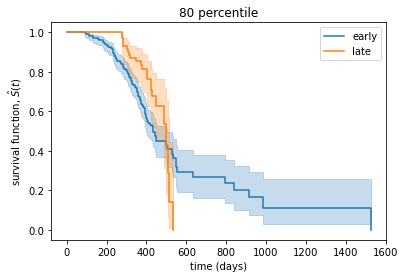

In [57]:
kmf.fit(surv_early_80["time_event"], surv_early_80["status"], label="early")
ax_kmf = kmf.plot()
kmf.fit(surv_late_80["time_event"], surv_late_80["status"], label="late")
ax_kmf = kmf.plot(ax=ax_kmf)

ax_kmf.set_xlabel('time (days)')
ax_kmf.set_ylabel('survival function, $\hat{S}(t)$')
plt.title('80 percentile')
ax_kmf

<AxesSubplot:title={'center':'70 percentile'}, xlabel='time (days)', ylabel='survival function, $\\hat{S}(t)$'>

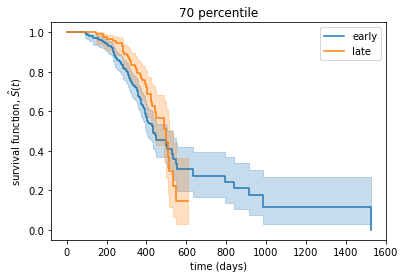

In [58]:
kmf.fit(surv_early_70["time_event"], surv_early_70["status"], label="early")
ax_kmf = kmf.plot()
kmf.fit(surv_late_70["time_event"], surv_late_70["status"], label="late")
ax_kmf = kmf.plot(ax=ax_kmf)

ax_kmf.set_xlabel('time (days)')
ax_kmf.set_ylabel('survival function, $\hat{S}(t)$')
plt.title('70 percentile')
ax_kmf

<AxesSubplot:title={'center':'60 percentile'}, xlabel='time (days)', ylabel='survival function, $\\hat{S}(t)$'>

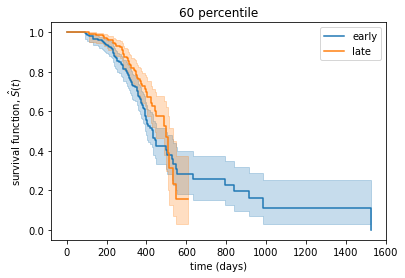

In [59]:
kmf.fit(surv_early_60["time_event"], surv_early_60["status"], label="early")
ax_kmf = kmf.plot()
kmf.fit(surv_late_60["time_event"], surv_late_60["status"], label="late")
ax_kmf = kmf.plot(ax=ax_kmf)

ax_kmf.set_xlabel('time (days)')
ax_kmf.set_ylabel('survival function, $\hat{S}(t)$')
plt.title('60 percentile')
ax_kmf

<AxesSubplot:title={'center':'50 percentile'}, xlabel='time (days)', ylabel='survival function, $\\hat{S}(t)$'>

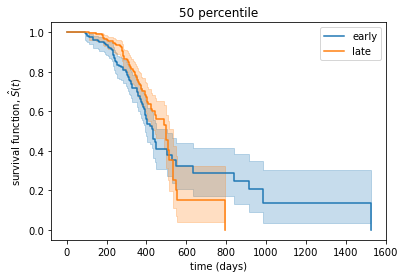

In [60]:
kmf.fit(surv_early_50["time_event"], surv_early_50["status"], label="early")
ax_kmf = kmf.plot()
kmf.fit(surv_late_50["time_event"], surv_late_50["status"], label="late")
ax_kmf = kmf.plot(ax=ax_kmf)

ax_kmf.set_xlabel('time (days)')
ax_kmf.set_ylabel('survival function, $\hat{S}(t)$')
plt.title('50 percentile')
ax_kmf

<AxesSubplot:title={'center':'40 percentile'}, xlabel='time (days)', ylabel='survival function, $\\hat{S}(t)$'>

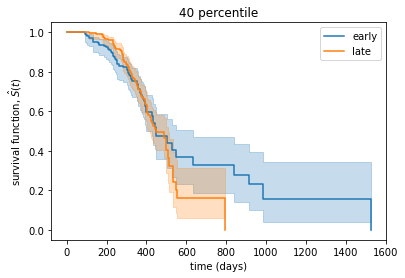

In [67]:
kmf.fit(surv_early_40["time_event"], surv_early_40["status"], label="early")
ax_kmf = kmf.plot()
kmf.fit(surv_late_40["time_event"], surv_late_40["status"], label="late")
ax_kmf = kmf.plot(ax=ax_kmf)

ax_kmf.set_xlabel('time (days)')
ax_kmf.set_ylabel('survival function, $\hat{S}(t)$')
plt.title('40 percentile')
ax_kmf

<AxesSubplot:title={'center':'39 percentile(0 in early)'}, xlabel='time (days)', ylabel='survival function, $\\hat{S}(t)$'>

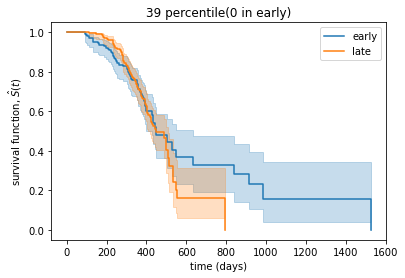

In [117]:
kmf.fit(surv_early_30["time_event"], surv_early_30["status"], label="early")
ax_kmf = kmf.plot()
kmf.fit(surv_late_30["time_event"], surv_late_30["status"], label="late")
ax_kmf = kmf.plot(ax=ax_kmf)

ax_kmf.set_xlabel('time (days)')
ax_kmf.set_ylabel('survival function, $\hat{S}(t)$')
plt.title('39 percentile(0 in early)')
ax_kmf

<AxesSubplot:title={'center':'11 percentile(no zero)'}, xlabel='time (days)', ylabel='survival function, $\\hat{S}(t)$'>

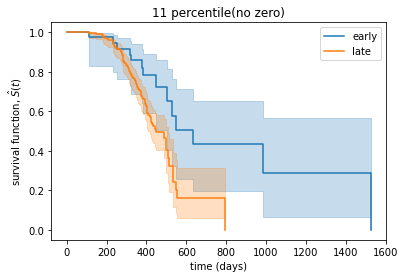

In [126]:
kmf.fit(surv_early_31["time_event"], surv_early_31["status"], label="early")
ax_kmf = kmf.plot()
kmf.fit(surv_late_31["time_event"], surv_late_31["status"], label="late")
ax_kmf = kmf.plot(ax=ax_kmf)

ax_kmf.set_xlabel('time (days)')
ax_kmf.set_ylabel('survival function, $\hat{S}(t)$')
plt.title('11 percentile(no zero)')
ax_kmf